# Tensors

## Scalars (rank-0 tensors)

In [1]:
import numpy as np

x = np.array(12)
print(x)
print(x.ndim)

12
0


## Vectors (rank-1 tensors)

In [2]:
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)

[12  3  6 14]
1


## Matrices (rank-2 tensors)

In [3]:
x = np.array([ [12, 3, 6, 14], 
                [1, 2, 3, 4], 
                [5, 6, 7, 8] ])
print(x)
print(x.ndim)
print(x.shape)

[[12  3  6 14]
 [ 1  2  3  4]
 [ 5  6  7  8]]
2
(3, 4)


## Rank-3 and higher-rank tensors

In [4]:
x = np.array(
    [ [ [12, 3, 6, 14], 
        [1, 2, 3, 4], 
        [5, 6, 7, 8] ],
      [ [9, 8, 7, 6], 
        [5, 4, 3, 2], 
        [1, 0, -1, -2] ]
    ])
print(x)
print(x.ndim)
print(x.shape)

[[[12  3  6 14]
  [ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9  8  7  6]
  [ 5  4  3  2]
  [ 1  0 -1 -2]]]
3
(2, 3, 4)


# MNIST in Keras

In [18]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.ndim)
print(x_train.shape)
print(x_test.ndim)
print(x_test.shape)

print(y_train.ndim)
print(y_train.shape)
print(y_test.ndim)
print(y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
3
(60000, 28, 28)
3
(10000, 28, 28)
1
(60000,)
1
(10000,)


(28, 28)


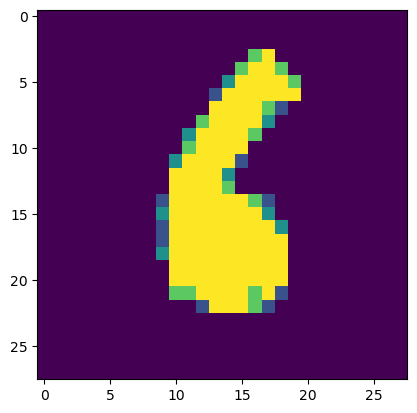

In [19]:
import matplotlib.pyplot as plt

SAMPLE_INDEX = 2025

digit = x_train[SAMPLE_INDEX]
print(digit.shape)
plt.imshow(digit)
plt.show()

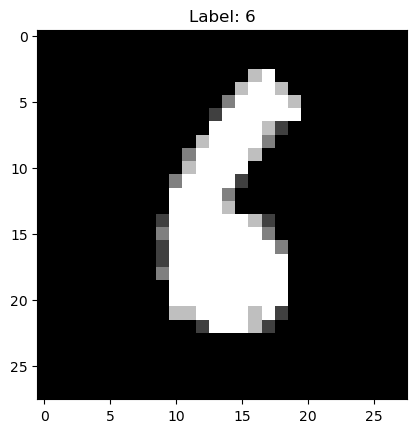

In [20]:
plt.imshow(digit, cmap=plt.cm.binary_r)
plt.title(f"Label: {y_train[SAMPLE_INDEX]}")
plt.show()

# MNIST in Keras

In [21]:
MNIST_MODEL_FILE = 'mnist_model_two_layers.h5'


In [23]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

if os.path.exists(MNIST_MODEL_FILE):
    model = keras.models.load_model(MNIST_MODEL_FILE)
else:
    print(f'{MNIST_MODEL_FILE} not found, training model from scratch.')
    model.fit(x_train, y_train, epochs=10, batch_size=32)
    model.save(MNIST_MODEL_FILE)

model.evaluate(x_test, y_test)




mnist_model_two_layers.h5 not found, training model from scratch.
Epoch 1/10


c:\Users\Sobhi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8565 - loss: 1.5450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9256 - loss: 0.2970
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9452 - loss: 0.2041
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9546 - loss: 0.1630
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9603 - loss: 0.1417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.1129
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9702 - loss: 0.1089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9735 - loss: 0.0931
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0890


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9658 - loss: 0.1571


[0.15711763501167297, 0.9657999873161316]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3 with 100.0 % confidence


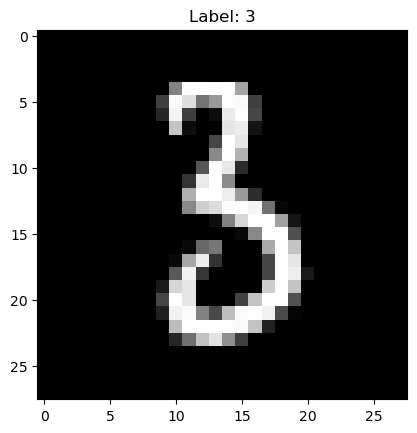

In [25]:
predictions = model.predict(x_test)
SAMPLE_INDEX = 2025

# single prediction
print(f'{np.argmax(predictions[SAMPLE_INDEX])} with {100 * np.max(predictions[SAMPLE_INDEX])} % confidence')
plt.imshow(x_test[SAMPLE_INDEX], cmap=plt.cm.binary_r)
plt.title(f"Label: {y_test[SAMPLE_INDEX]}")
plt.show()

In [26]:
predictions.shape

(10000, 10)

In [27]:
wrong_predictions = []
for i, prediction in enumerate(predictions):
    if np.argmax(prediction) != y_test[i]:
        wrong_predictions.append(i)

In [28]:
print(f'Wrong predictions: {len(wrong_predictions)} out of {len(y_test)}')

Wrong predictions: 342 out of 10000


Index: 62, Predicted: 5, Actual: 9


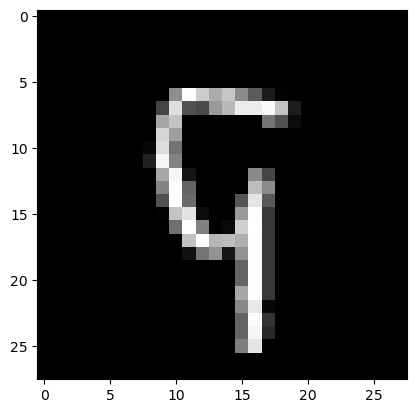

Index: 104, Predicted: 5, Actual: 9


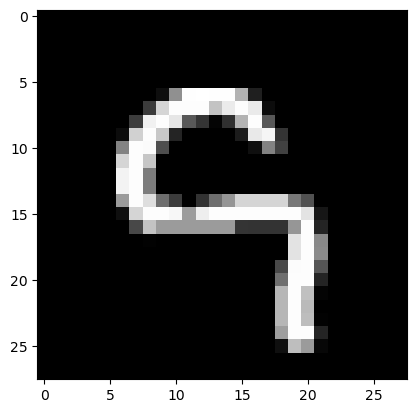

Index: 149, Predicted: 4, Actual: 2


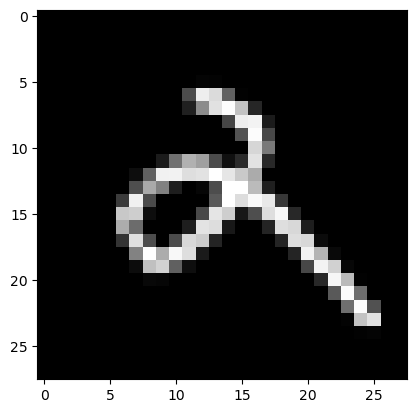

Index: 185, Predicted: 4, Actual: 9


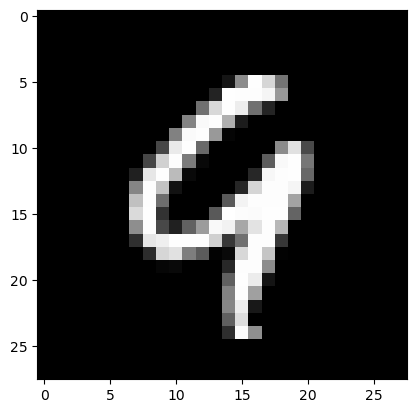

Index: 217, Predicted: 5, Actual: 6


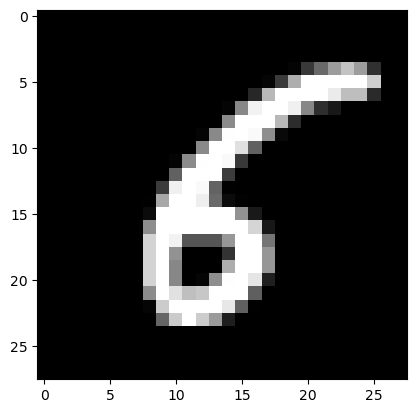

In [29]:
for wrong_index in wrong_predictions[:5]:
    print(f'Index: {wrong_index}, Predicted: {np.argmax(predictions[wrong_index])}, Actual: {y_test[wrong_index]}')
    plt.imshow(x_test[wrong_index], cmap=plt.cm.binary_r)
    plt.show()

## MNIST Keras

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras

In [31]:

class MnistKerasConfig:
    def __init__(self):
        self.batch_size = 32
        self.num_classes = 10
        self.epochs = 12
        self.img_rows, self.img_cols = 28, 28
        self.input_shape = (self.img_rows, self.img_cols, 1)
        self.loss_function = 'sparse_categorical_crossentropy'
        self.optimizer = 'adam'
        self.metrics = ['accuracy']
        self.layers = [100, 50]
        self.validation_split = 0.2
        self.verbose = 1
        self.model_file_path = "mnist_keras_model.h5"

class MnistKeras:
    def __init__(self, config: MnistKerasConfig):
        self.config = config

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
        x_train = x_train.astype('float32') / 255
        x_test = x_test.astype('float32') / 255
        return (x_train, y_train), (x_test, y_test)
    
    # returns a tuple (new, model): new is True if a new model is created.
    def build_model(self, enforce_new=False):
        if os.path.exists(self.config.model_file_path) and not enforce_new:
            model = keras.models.load_model(self.config.model_file_path)
            if self.config.verbose:
                print(f'Model - {self.config.model_file_path} - loaded from file.')
            return False, model
        
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(self.config.img_rows, self.config.img_cols)),
            keras.layers.Dense(self.config.layers[0], activation='relu'),
            keras.layers.Dense(self.config.layers[1], activation='relu'),
            keras.layers.Dense(self.config.num_classes, activation='softmax')])

        model.compile(optimizer=self.config.optimizer,
                    loss=self.config.loss_function,
                    metrics=self.config.metrics)
        return True, model
    
    def train(self, model, x_train, y_train):
        history = model.fit(x_train, y_train,
                            batch_size=self.config.batch_size,
                            epochs=self.config.epochs,
                            validation_split=self.config.validation_split,
                            verbose=self.config.verbose)
        model.save(self.config.model_file_path)
        if self.config.verbose:
            print(f"Model saved to {self.config.model_file_path}")

        return history
    
    def plot_history(self, history):
        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.5, 1])
        plt.legend(loc='lower right')
        plt.show()


Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9146 - loss: 0.2918 - val_accuracy: 0.9539 - val_loss: 0.1564
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9603 - loss: 0.1312 - val_accuracy: 0.9630 - val_loss: 0.1236
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9728 - loss: 0.0913 - val_accuracy: 0.9655 - val_loss: 0.1182
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0681 - val_accuracy: 0.9727 - val_loss: 0.0951
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0524 - val_accuracy: 0.9712 - val_loss: 0.0958
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0430 - val_accuracy: 0.9690 - val_loss: 0.1078
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0352 - val_accuracy: 0.9691 - val_loss: 0.1233
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0294 - 

Model saved to mnist_keras_model.h5


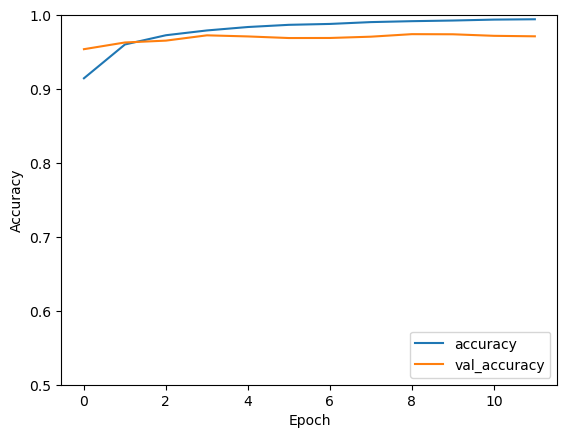

In [32]:
# test the MnistKeras class
config = MnistKerasConfig()
mnist_keras = MnistKeras(config)
new, model = mnist_keras.build_model()
if new is True:
    (x_train, y_train), (x_test, y_test) = mnist_keras.load_data()
    history = mnist_keras.train(model, x_train, y_train)
    mnist_keras.plot_history(history)

In [33]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.1185


[0.1185314804315567, 0.9735000133514404]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3 with 99.98 % confidence.


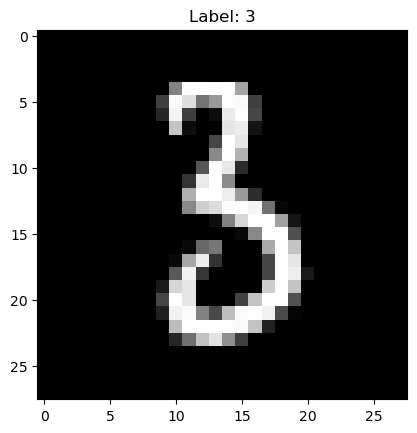

6 with 100.00 % confidence.


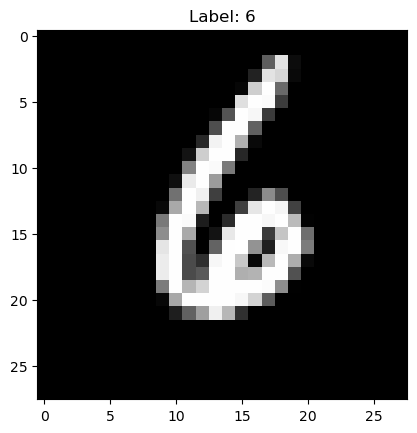

1 with 100.00 % confidence.


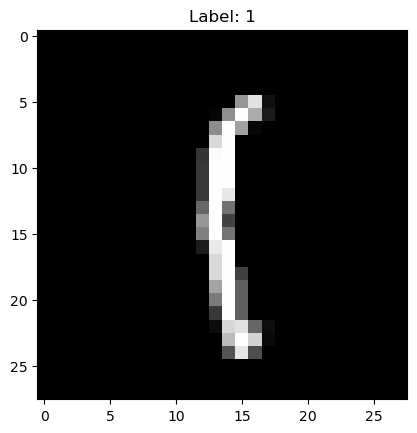

In [34]:
SAMPLE_INDEX = 2025
num_samples = 3

# predict a batch of samples
predictions = model.predict(x_test[SAMPLE_INDEX:SAMPLE_INDEX+num_samples])

for i, prediction in enumerate(predictions):
    print(f'{np.argmax(prediction)} with {100 * np.max(prediction):.2f} % confidence.')
    plt.imshow(x_test[SAMPLE_INDEX+i], cmap=plt.cm.binary_r)
    plt.title(f"Label: {y_test[SAMPLE_INDEX+i]}")
    plt.show()


In [35]:
wrong_predictions = []
predictions = model.predict(x_test)
for i, prediction in enumerate(predictions):
    if np.argmax(prediction) != y_test[i]:
        wrong_predictions.append(i)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


In [36]:
print(f'Wrong predictions: {len(wrong_predictions)} out of {len(y_test)}')

Wrong predictions: 265 out of 10000


Index: 61, Predicted: 2, Actual: 8


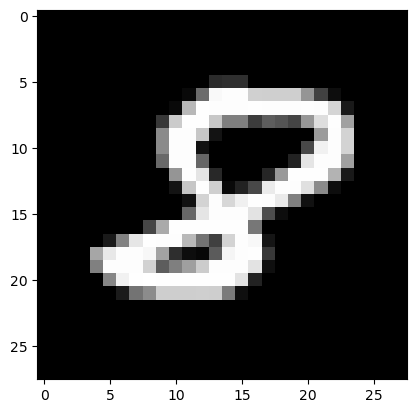

Index: 80, Predicted: 9, Actual: 7


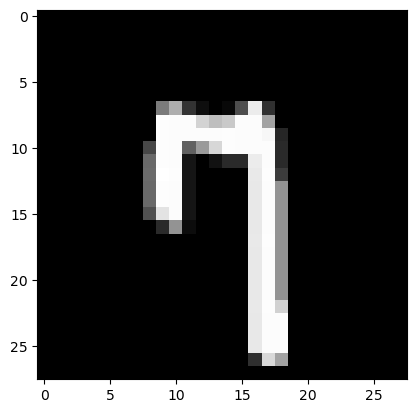

Index: 92, Predicted: 4, Actual: 9


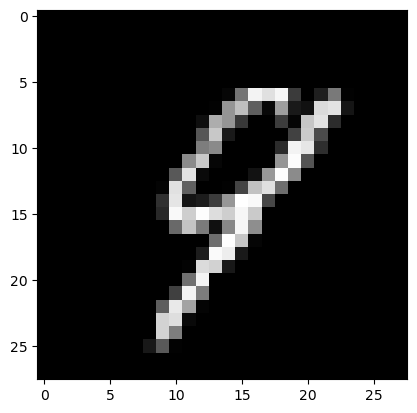

Index: 124, Predicted: 4, Actual: 7


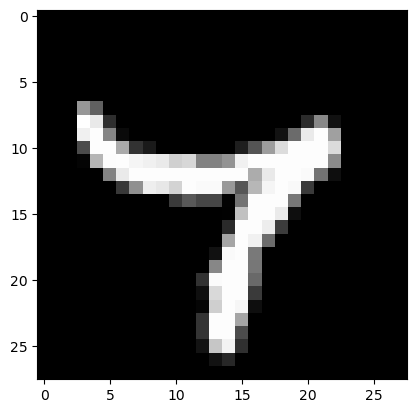

Index: 247, Predicted: 2, Actual: 4


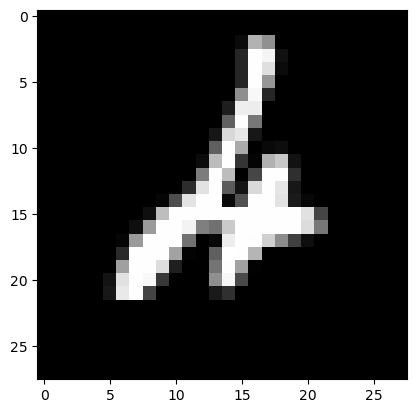

In [37]:
for wrong_index in wrong_predictions[:5]:
    print(f'Index: {wrong_index}, Predicted: {np.argmax(predictions[wrong_index])}, Actual: {y_test[wrong_index]}')
    plt.imshow(x_test[wrong_index], cmap=plt.cm.binary_r)
    plt.show()

In [7]:
from mnist_keras import MnistKeras, MnistKerasConfig

config = MnistKerasConfig()
mnist = MnistKeras(config)

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Load existing model (do NOT enforce new)
is_new, model = mnist.build_model(enforce_new=False)
# Evaluate on MNIST test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy on MNIST:", test_acc)


Model - mnist_keras_model.h5 - loaded from file.
Test accuracy on MNIST: 0.9735000133514404


In [24]:
import os
import subprocess

folder = "test_images"
files = sorted(os.listdir(folder))

for filename in files:
    if not filename.lower().endswith((".png", ".jpg", ".jpeg")):
        continue

    true_label = filename.split("_")[0]
    img_path = os.path.join(folder, filename)

    print(f"\nRunning module8.py on {filename}...")

    # Call module8.py exactly like CLI:
    subprocess.run(["python", "module8.py", img_path, true_label])



Running module8.py on 0_0.png...

Running module8.py on 0_1.png...

Running module8.py on 0_2.png...

Running module8.py on 0_3.png...

Running module8.py on 0_4.png...

Running module8.py on 1_0.png...

Running module8.py on 1_1.png...

Running module8.py on 1_2.png...

Running module8.py on 1_3.png...

Running module8.py on 1_4.png...

Running module8.py on 2_0.png...

Running module8.py on 2_1.png...

Running module8.py on 2_2.png...

Running module8.py on 2_3.png...

Running module8.py on 2_4.png...

Running module8.py on 3_0.png...

Running module8.py on 3_1.png...

Running module8.py on 3_2.png...

Running module8.py on 3_3.png...

Running module8.py on 3_4.png...

Running module8.py on 4_0.png...

Running module8.py on 4_1.png...

Running module8.py on 4_2.png...

Running module8.py on 4_3.png...

Running module8.py on 4_4.png...

Running module8.py on 5_0.png...

Running module8.py on 5_1.png...

Running module8.py on 5_2.png...

Running module8.py on 5_3.png...

Running modul

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\0_0.png is for digit 0, but the inference result is 2.



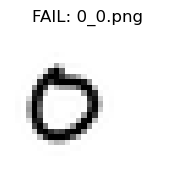

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\0_1.png is for digit 0, and the inference result is 0.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\0_2.png is for digit 0, but the inference result is 9.



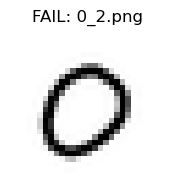

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\0_3.png is for digit 0, and the inference result is 0.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\0_4.png is for digit 0, but the inference result is 7.



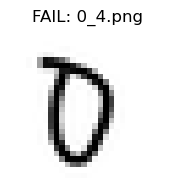

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\1_0.png is for digit 1, but the inference result is 8.



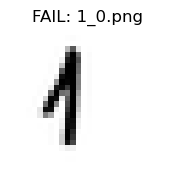

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\1_1.png is for digit 1, but the inference result is 8.



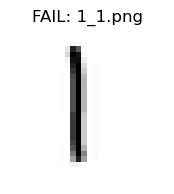

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\1_2.png is for digit 1, but the inference result is 8.



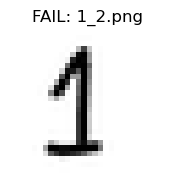

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\1_3.png is for digit 1, but the inference result is 9.



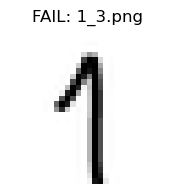

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\1_4.png is for digit 1, and the inference result is 1.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\2_0.png is for digit 2, but the inference result is 4.



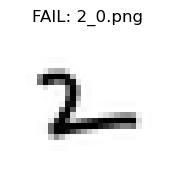

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\2_1.png is for digit 2, but the inference result is 4.



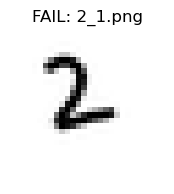

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\2_2.png is for digit 2, but the inference result is 8.



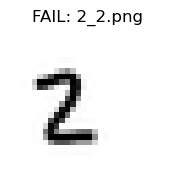

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\2_3.png is for digit 2, and the inference result is 2.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\2_4.png is for digit 2, and the inference result is 2.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\3_0.png is for digit 3, but the inference result is 8.



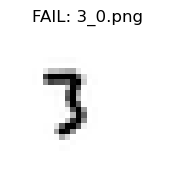

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\3_1.png is for digit 3, but the inference result is 2.



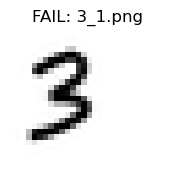

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\3_2.png is for digit 3, but the inference result is 8.



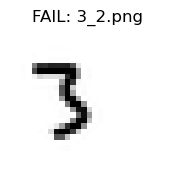

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\3_3.png is for digit 3, but the inference result is 2.



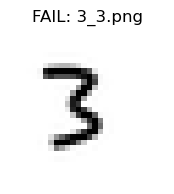

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\3_4.png is for digit 3, and the inference result is 3.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\4_0.png is for digit 4, and the inference result is 4.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\4_1.png is for digit 4, but the inference result is 5.



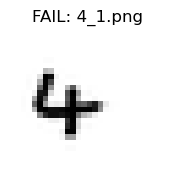

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\4_2.png is for digit 4, but the inference result is 8.



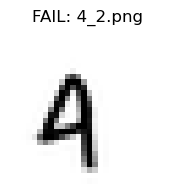

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\4_3.png is for digit 4, and the inference result is 4.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\4_4.png is for digit 4, and the inference result is 4.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\5_0.png is for digit 5, but the inference result is 8.



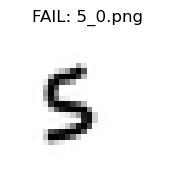

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\5_1.png is for digit 5, and the inference result is 5.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\5_2.png is for digit 5, but the inference result is 8.



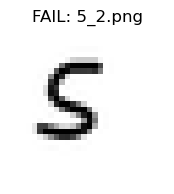

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\5_3.png is for digit 5, and the inference result is 5.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\5_4.png is for digit 5, but the inference result is 9.



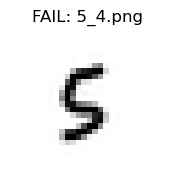

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\6_0.png is for digit 6, and the inference result is 6.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\6_1.png is for digit 6, but the inference result is 4.



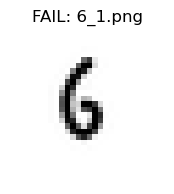

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\6_2.png is for digit 6, but the inference result is 8.



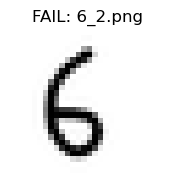

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\6_3.png is for digit 6, and the inference result is 6.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\6_4.png is for digit 6, but the inference result is 4.



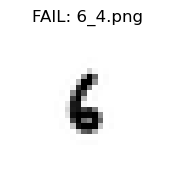

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\7_0.png is for digit 7, but the inference result is 3.



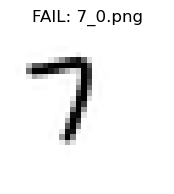

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\7_1.png is for digit 7, and the inference result is 7.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\7_2.png is for digit 7, and the inference result is 7.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\7_3.png is for digit 7, and the inference result is 7.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\7_4.png is for digit 7, and the inference result is 7.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\8_0.png is for digit 8, but the inference result is 4.



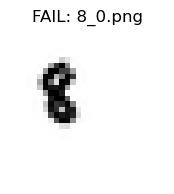

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\8_1.png is for digit 8, but the inference result is 4.



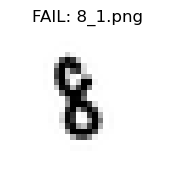

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\8_2.png is for digit 8, but the inference result is 2.



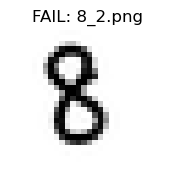

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\8_3.png is for digit 8, but the inference result is 2.



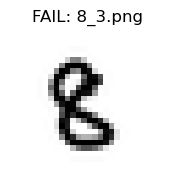

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Fail: Image test_images\8_4.png is for digit 8, but the inference result is 3.



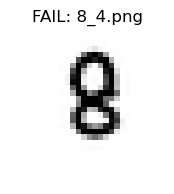

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\9_0.png is for digit 9, and the inference result is 9.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\9_1.png is for digit 9, and the inference result is 9.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\9_2.png is for digit 9, and the inference result is 9.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\9_3.png is for digit 9, and the inference result is 9.

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images\9_4.png is for digit 9, and the inference result is 9.



In [25]:
import os
import subprocess
from PIL import Image
import matplotlib.pyplot as plt

folder = "test_images"
files = sorted(os.listdir(folder))

for filename in files:
    if not filename.lower().endswith(".png"):
        continue

    true_label = filename.split("_")[0]
    img_path = os.path.join(folder, filename)

    # Capture module8.py output
    result = subprocess.run(
        ["python", "module8.py", img_path, true_label],
        capture_output=True,
        text=True
    )

    print(result.stdout)

    # If module8.py printed "Fail", show the image
    if "Fail" in result.stdout:
        img = Image.open(img_path).convert("L")
        plt.figure(figsize=(2,2))
        plt.imshow(img, cmap="gray")
        plt.title(f"FAIL: {filename}")
        plt.axis("off")
        plt.show()


In [23]:
!python module8.py test_images/1_4.png 1

Model - mnist_keras_model.h5 - loaded from file.
Figure(640x480)
Success: Image test_images/1_4.png is for digit 1, and the inference result is 1.


2025-11-18 20:03:04.162752: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 20:03:06.522654: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 20:03:08.170299: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
